# **Shein Men Fashion Data Analysis Project**

In [1]:
#List of packages used in this analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
#Import the dataset
shein = pd.read_csv("C:\\Users\\Rudzani\\Desktop\\Project 1 Python\\shein.csv")

In [3]:
# Displaying all column names to decide which ones to keep and which ones to remove.
sorted(shein)

['average_rating',
 'category_id',
 'category_name',
 'color',
 'description',
 'discount_percentage',
 'product_id',
 'retail_price/amount',
 'retail_price/amount_with_symbol',
 'reviews_count',
 'sale_price/amount',
 'sale_price/amount_with_symbol',
 'sku',
 'title',
 'url']

In [4]:
# Removing the specified columns from the DataFrame.
shein = shein.drop(columns = ['product_id','sku','sale_price/amount_with_symbol','retail_price/amount_with_symbol','url'])


In [5]:
# Displaying information about the DataFrame.
shein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1000 non-null   object 
 1   color                1000 non-null   object 
 2   sale_price/amount    1000 non-null   float64
 3   retail_price/amount  1000 non-null   float64
 4   discount_percentage  1000 non-null   int64  
 5   category_name        1000 non-null   object 
 6   category_id          1000 non-null   int64  
 7   description          1000 non-null   object 
 8   reviews_count        1000 non-null   int64  
 9   average_rating       1000 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [6]:
# Displaying descriptive statistics of the DataFrame.
shein.describe()

,sale_price/amount,retail_price/amount,discount_percentage,category_id,reviews_count,average_rating
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,12.645300,16.54844,22.741000,3150.686000,533.81700,4.667020
std,5.746236,7.58736,12.731693,2302.790795,435.50684,1.056461
min,3.170000,6.59000,0.000000,1974.000000,0.00000,0.000000
25%,8.840000,11.39000,13.000000,1979.000000,100.00000,4.870000
50%,11.490000,13.99000,25.000000,1980.000000,500.00000,4.920000
75%,15.490000,20.71500,31.000000,2484.000000,1000.00000,4.960000
max,60.490000,69.79000,70.000000,9042.000000,1000.00000,5.000000


In [7]:
#Find the total null values in each column of the dataset.
shein.isnull().sum()

title                  0
color                  0
sale_price/amount      0
retail_price/amount    0
discount_percentage    0
category_name          0
category_id            0
description            0
reviews_count          0
average_rating         0
dtype: int64

The DataFrame contains no null values in each column

In [8]:
# Finding the number of unique values in each column of the dataset.
shein.nunique()

title                  881
color                   60
sale_price/amount      537
retail_price/amount    254
discount_percentage     59
category_name           50
category_id             50
description            971
reviews_count           75
average_rating          52
dtype: int64

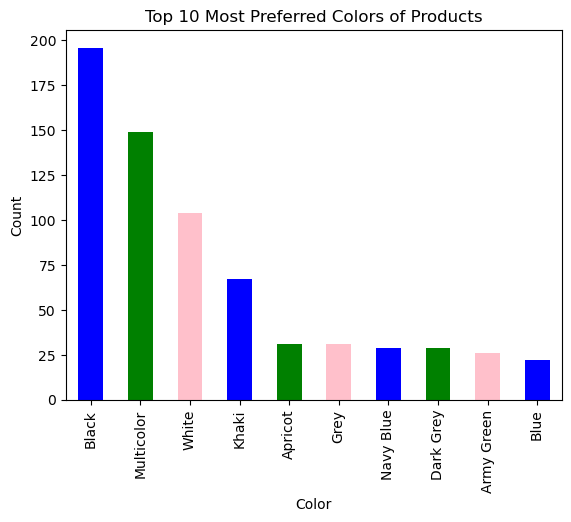

In [9]:
#Find the top 10 most preffered colors of products by men.
# Count the occurrences of each color
color_counts = shein['color'].value_counts()

# Selecting the top 10 most preferred colors
top_colors = color_counts.head(10)

# Plotting as a bar graph
top_colors.plot(kind='bar', color=['blue', 'green', 'pink'])

# Adding titles and labels
plt.title('Top 10 Most Preferred Colors of Products')
plt.xlabel('Color')
plt.ylabel('Count')

# Display the bar graph
plt.show()


**The above bar graph shows the top 10 most preferred colors of products.This bar graph gives us insight about which color most men prefer to buy which is Black.**

C:\Users\Rudzani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


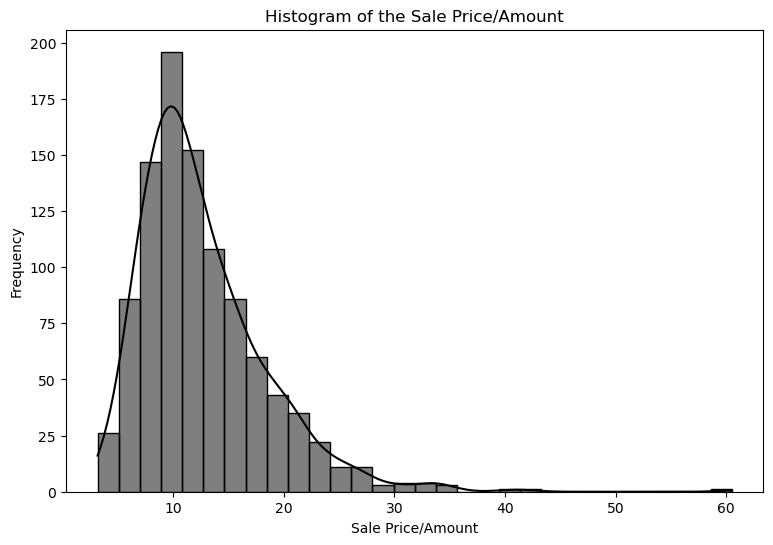

In [10]:
#Find at which sale price do most male prefer to buy items from shein.
plt.figure(figsize=(9, 6)) 
sns.histplot(shein['sale_price/amount'], bins=30, kde=True, color='black') 
plt.title('Histogram of the Sale Price/Amount')  
plt.xlabel('Sale Price/Amount')
plt.ylabel('Frequency') 
plt.show() 

**From the above histogram,it is clear to see that most customers prefer to buy at the sale price of 10.**

C:\Users\Rudzani\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


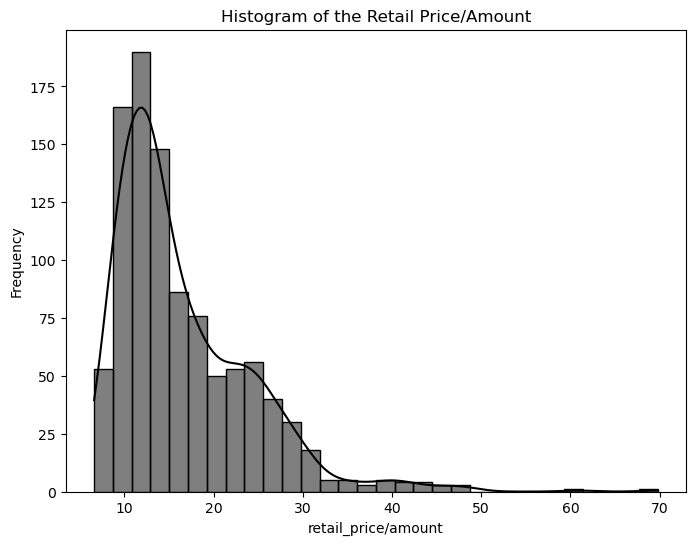

In [11]:
#Find retail prices which most customers prefer.
plt.figure(figsize=(8, 6))
sns.histplot(shein['retail_price/amount'], bins=30, kde=True, color='black')
plt.title('Histogram of the Retail Price/Amount')
plt.xlabel('retail_price/amount') 
plt.ylabel('Frequency')
plt.show()

**From the above histogram,it is clear to see that most customer prefer to buy at the retail price between 10 and 20.**

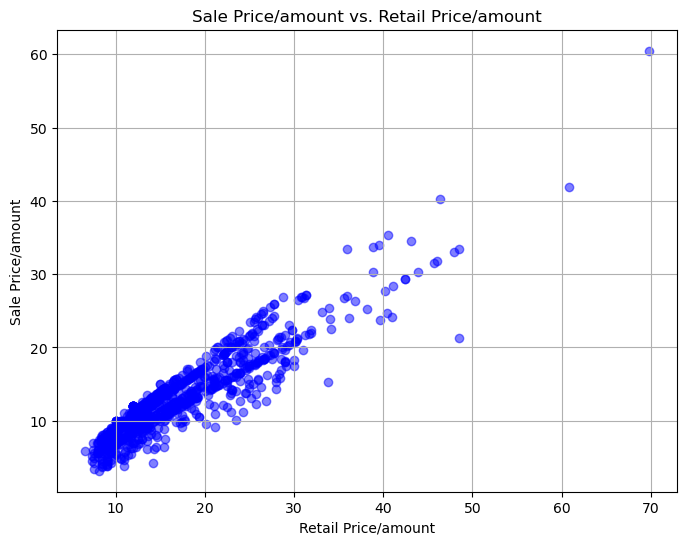

In [12]:
#Compare Sale price/amount against Retail price/amount.
plt.figure(figsize=(8, 6))
plt.scatter(shein['retail_price/amount'], shein['sale_price/amount'], color='blue', alpha=0.5)
plt.title('Sale Price/amount vs. Retail Price/amount')
plt.xlabel('Retail Price/amount')
plt.ylabel('Sale Price/amount')
plt.grid(True)
plt.show()

**From the above,it is clear that customers prefer sale price and retail betwwen 10 and 30**

In [13]:
# Calculate total sales price.
total_sales_price = shein['sale_price/amount'].sum()

# Calculate total retail price
total_retail_price = shein['retail_price/amount'].sum()

print("Total Sales Price:", total_sales_price)
print("Total Retail Price:", total_retail_price)


Total Sales Price: 12645.300000000001
Total Retail Price: 16548.440000000002


In [15]:
#What are the most common words used in product descriptions.
# Combine all descriptions into a single string
all_descriptions = ' '.join(shein['description'].astype(str))

# Tokenize the words and count their occurrences.
words_count = Counter(all_descriptions.split())

# Get the most common words.
most_common_words = words_count.most_common(10)
print("Most Common Words in Product Descriptions:")
print(most_common_words)


Most Common Words in Product Descriptions:
[('Type:', 3807), ('Sleeve', 2175), ('Regular', 1673), ('Fit', 1552), ('Details:', 1385), ('Length:', 1340), ('Composition:', 1189), ('Pattern', 1186), ('Color:', 1000), ('Care', 998)]


In [16]:
#Find top selling products for men.
top_selling_products = shein.groupby('title')['sale_price/amount'].sum().nlargest(5)
print("Top Selling Products:")
print(top_selling_products)


Top Selling Products:
title
Manfinity Homme Men Solid Button Up Shirt                                                             69.37
Manfinity Homme Men Contrast Trim Polo Shirt                                                          66.70
Manfinity Mode Men Single Button Blazer & Suit Pants Set                                              62.01
Manfinity AFTRDRK 1set Men's Plus Size Turn-Down Collar Single Button Blazer, Vest, And Pants Suit    60.49
Manfinity Chillmode Men Coconut Tree Print Tee & Drawstring Waist Shorts                              58.16
Name: sale_price/amount, dtype: float64


In [17]:
#Find average discount percentage across all products.
avg_discount_percentage = shein['discount_percentage'].mean()
print("Average Discount Percentage:", avg_discount_percentage)


Average Discount Percentage: 22.741


In [18]:
#Find Correlation between Discount Percentage and Average Rating.
correlation = shein['discount_percentage'].corr(shein['average_rating'])
print("Correlation between Discount Percentage and Average Rating:", correlation)


Correlation between Discount Percentage and Average Rating: 0.13612093590734184
